<a href="https://colab.research.google.com/github/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/forwardModels/DiscreteForwardModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging
### David J. Brady
### University of Arizona

## Discrete Forward Models

This notebook supports ideas developed in Chapter 2 of *Computational Imaging*. Specifically we consider the structure of discrete forward models for continuous signals. 

#### initialization code

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng



Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
dvipng is already the newest version (1.15-1).
texlive-fonts-extra is already the newest version (2017.20180305-2).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


## System Description

Consider $f(x)\in V_B$. For example, we might consider
$$f(x)=\cos (\frac{2\pi }x) e^{-\frac{ x^2}{400} }
$$
as illustrated below. the greatest spatial frequency if $f(x)$ is approximately $1$,  so as long as the sampling period is $>1/2$ the aliasing should not occur. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '${\\hat f}(u)$')

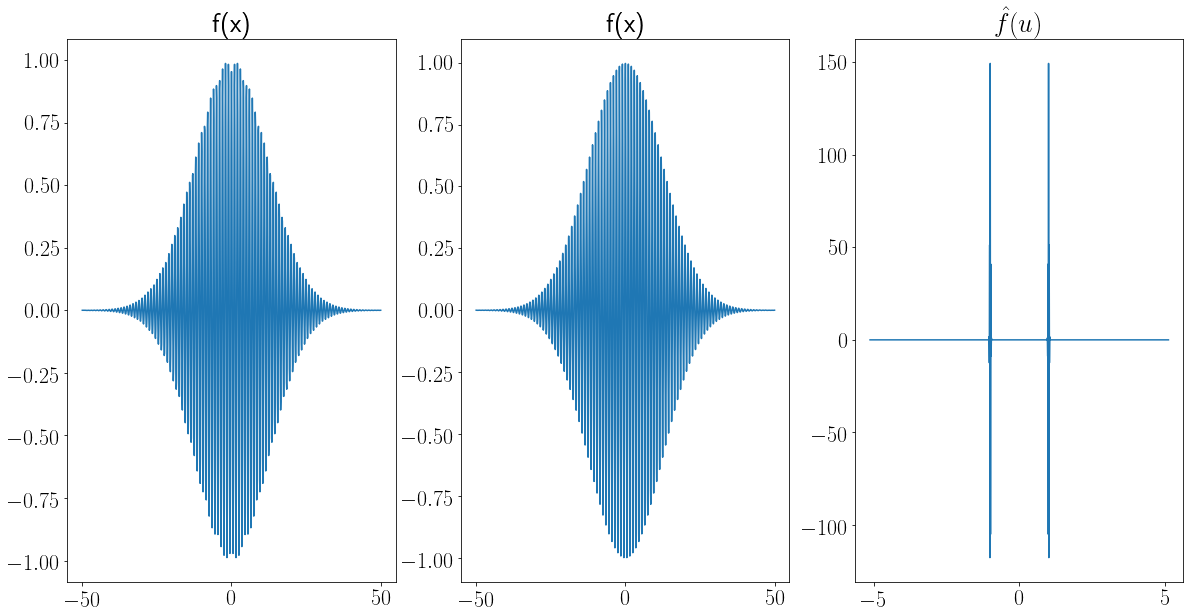

In [10]:
N=1024
X=50
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*x)*np.exp(-x**2/300)
  return f
# now let's make interpolated function
fUp= interp1d(xrange,f(xrange), kind='cubic')
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('f(x)')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,4*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.fft.fftshift(np.fft.fft(f(xrange))))
plt.title('${\hat f}(u)$')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '${\\hat f}(u)$')

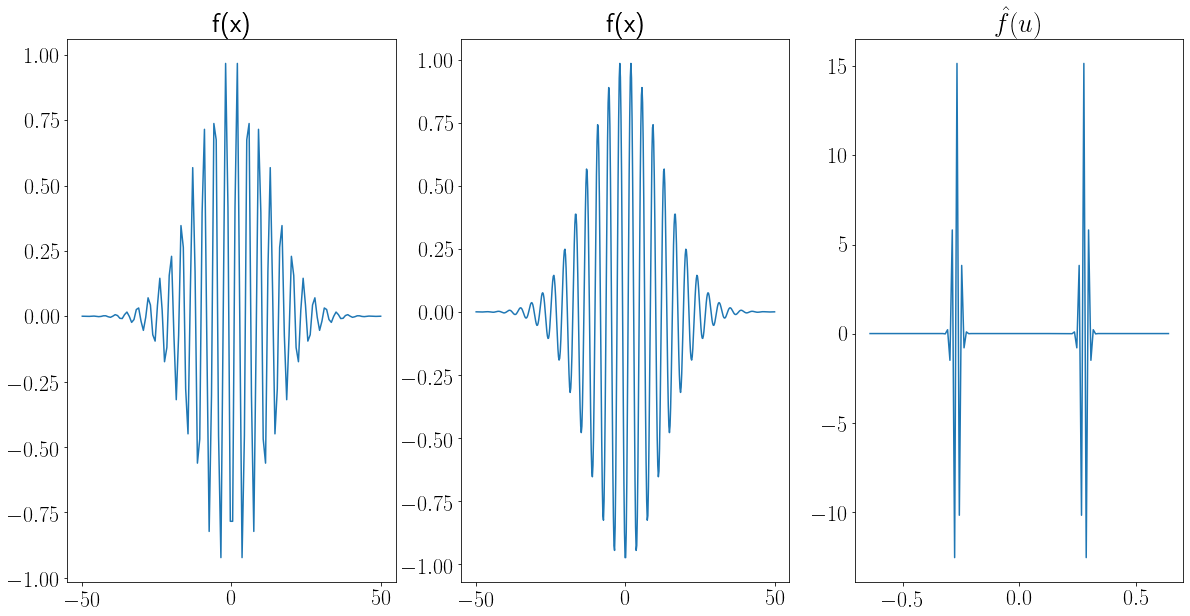

In [18]:
N=128
X=50
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*x)*np.exp(-x**2/300)
  return f
# now let's make interpolated function
fUp= interp1d(xrange,f(xrange), kind='cubic')
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('f(x)')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,4*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.fft.fftshift(np.fft.fft(f(xrange))))
plt.title('${\hat f}(u)$')

If we sample above nyquist then the signal will be faithfully reconstructed, if the sampling rante is lower than the nyquist rate we will see aliasing. In the present case, the maximum spatial frequency is just under 1, meaning that the sampling period should be less than .5. If we sample at a lower rate, say delta=1, with a delta function impluse response, the measured data will look like this:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '${\\hat g}(u)$')

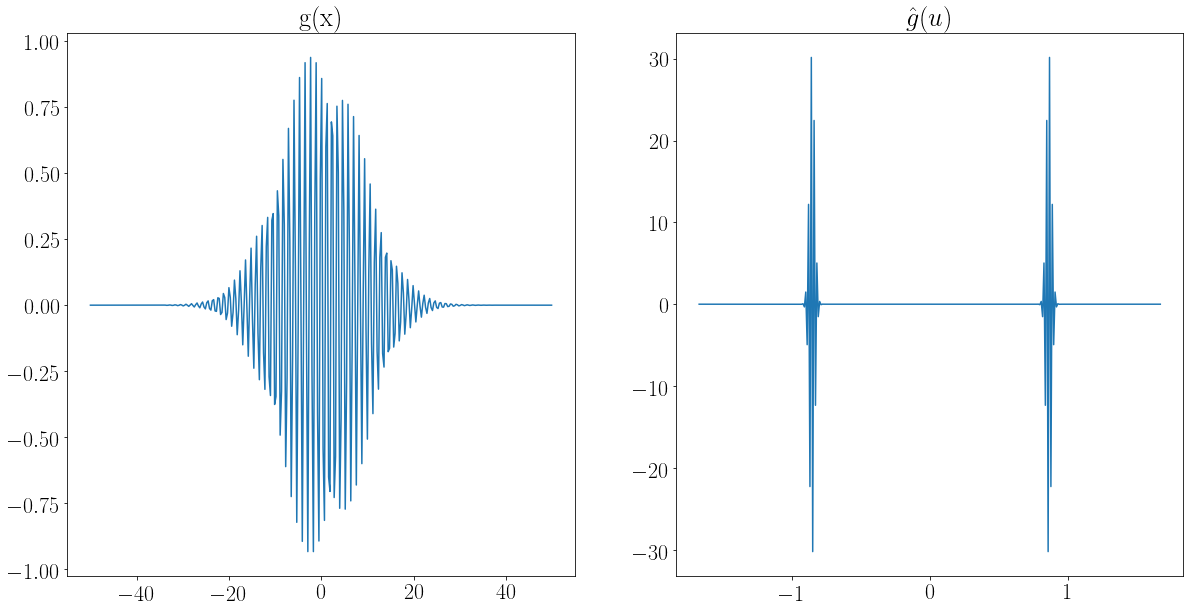

In [17]:
N=512
X=50
B=N/(4*X)
xrange=np.arange(-X,X,.3)
bp=len(xrange)/(4*X)
urange=np.linspace(-bp,bp,len(xrange))
def g(x):
  g=np.cos(2*np.pi*B*x/3.)*np.exp(-(B**2)*x**2/1000)
  return g
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.subplot(1,2,1)
plt.plot(xrange,f(xrange))
plt.title('g(x)')
plt.subplot(1,2,2)
plt.plot(urange,np.fft.fftshift(np.fft.fft(f(xrange))))
plt.title('${\hat g}(u)$')

In [7]:
xrange[5]

-45